In [105]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
train = pd.read_csv('../data/featured/featured_train.csv')
test = pd.read_csv('../data/featured/featured_test.csv')
unseen = pd.read_csv('../data/featured/featured_unseen.csv')

In [107]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

In [108]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [109]:
X_train.shape, X_test.shape, unseen.shape

((712, 13), (179, 13), (418, 13))

In [110]:
logistic_model = joblib.load('../models/logistic_regression.pkl')
random_forest_model = joblib.load('../models/random_forest.pkl')
xgboost_model = joblib.load('../models/xgboost_model.pkl')

In [111]:
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
}

=== Logistic Regression ===
Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



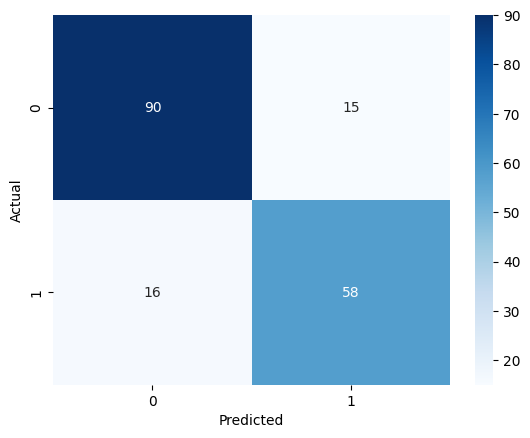

=== Random Forest ===
Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



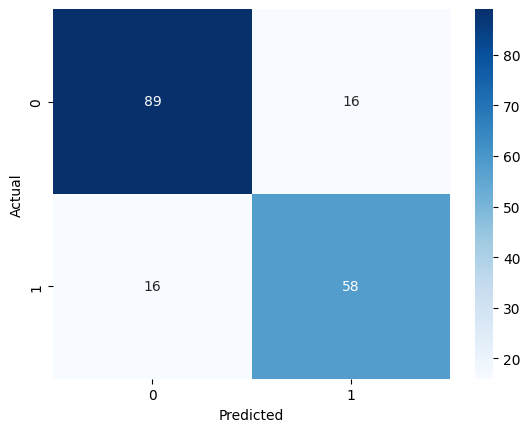

=== XGBoost ===
Accuracy: 0.8380
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



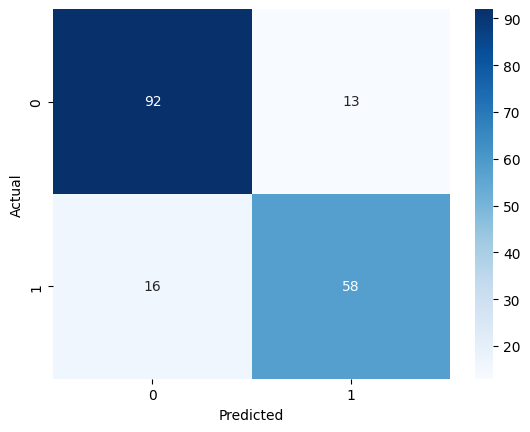

In [112]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'=== {name} ===')
    print(f'Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Feature Importance

Top 10 Feature Importance:
       Feature  Importance
8     Title_Mr    0.525585
12    Pclass_3    0.118711
10  Title_Rare    0.117138
3     HasCabin    0.059202
1   FamilySize    0.046718
4     Fare_log    0.025147
11    Pclass_2    0.021418
6   Embarked_S    0.021334
0          Age    0.019259
7   Title_Miss    0.018309


C:\Users\66959\AppData\Local\Temp\ipykernel_17236\3762953660.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


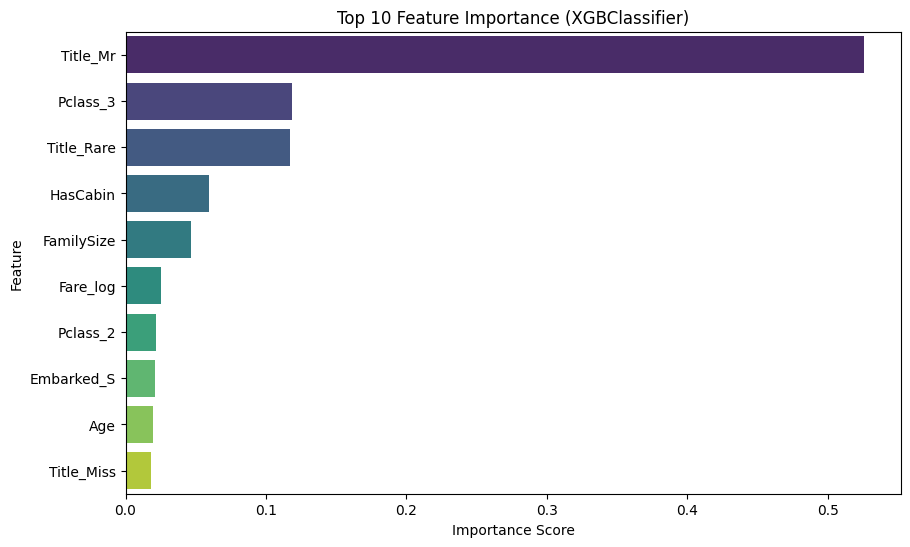

In [113]:
target_model = xgboost_model 

importances = target_model.feature_importances_
feature_names = X_train.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Feature Importance:")
print(feature_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')

plt.title(f'Top 10 Feature Importance ({target_model.__class__.__name__})')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.show()

# Unseen

In [114]:
passengerId = pd.read_csv('../data/raw/unseen.csv')['PassengerId']

In [115]:
y_pred1 = logistic_model.predict(unseen)
y_pred2 = random_forest_model.predict(unseen)

In [116]:
submission_logistic_regresion = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': y_pred1
})
submission_random_forest = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': y_pred2
})

In [117]:
submission_logistic_regresion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
submission_logistic_regresion.to_csv('../data/submission_logistic_regression.csv', index=False)
submission_random_forest.to_csv('../data/submission_random_forest.csv', index=False)